# Data available

In [1]:
import datacube
acube = datacube.Datacube(app='sample_8', env='acube')
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
acube.list_products().dropna(axis=1)

name                                        description  \
id                                                                            
1           B_Sentinel_2         Atmospherically corrected Sentinel 2 bands   
2   CLOUDMASK_Sentinel_2            Cloud mask and buffer derived from SCL.   
3       FAPAR_Sentinel_2    Fraction of Photosynthetically Active Radiation   
4      FCOVER_Sentinel_2                       Fraction of vegetation cover   
13        GMR_Sentinel_1  Backscatter from a unit ground area projected ...   
5         LAI_Sentinel_2                                    Leaf Area Index   
6          MB_Sentinel_2  Monthly composite atmospherically corrected Se...   
7      MFAPAR_Sentinel_2                            Monthly composite FAPAR   
8     MFCOVER_Sentinel_2                           Monthly composite FCOVER   
9        MLAI_Sentinel_2                              Monthly composite LAI   
10       MTCI_Sentinel_2                 Monthly composite True Color Image   
11        SCL_Sentinel_2                         Scene Classification Layer   
14       SIG0_Sentinel_1  Backscatter returned to the satellites antenna...   
12        TCI_Sentinel_2                                   True Color Image   

         product_type    platform   format instrument  \
id                                                      
1           BOKU_B_S2  Sentinel-2  GeoTIFF        MSI   
2   BOKU_CLOUDMASK_S2  Sentinel-2  GeoTIFF        MSI   
3       BOKU_FAPAR_S2  Sentinel-2  GeoTIFF        MSI   
4      BOKU_FCOVER_S2  Sentinel-2  GeoTIFF        MSI   
13         TUW_GMR_S1  Sentinel-1  GeoTIFF        SAR   
5         BOKU_LAI_S2  Sentinel-2  GeoTIFF        MSI   
6          BOKU_MB_S2  Sentinel-2  GeoTIFF        MSI   
7      BOKU_MFAPAR_S2  Sentinel-2  GeoTIFF        MSI   
8     BOKU_MFCOVER_S2  Sentinel-2  GeoTIFF        MSI   
9        BOKU_MLAI_S2  Sentinel-2  GeoTIFF        MSI   
10       BOKU_MTCI_S2  Sentinel-2  GeoTIFF        MSI   
11        BOKU_SCL_S2  Sentinel-2  GeoTIFF        MSI   
14        TUW_SIG0_S1  Sentinel-1  GeoTIFF        SAR   
12        BOKU_TCI_S2  Sentinel-2  GeoTIFF        MSI   

                                                  crs resolution  \
id                                                                 
1   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
2   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
3   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
4   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
13  PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84"...  (-10, 10)   
5   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
6   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
7   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
8   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
9   PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
10  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
11  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   
14  PROJCS["Azimuthal_Equidistant",GEOGCS["WGS 84"...  (-10, 10)   
12  PROJCS["unnamed",GEOGCS["WGS 84",DATUM["WGS_19...  (-10, 10)   

   spatial_dimensions  
id                     
1              (y, x)  
2              (y, x)  
3              (y, x)  
4              (y, x)  
13             (y, x)  
5              (y, x)  
6              (y, x)  
7              (y, x)  
8              (y, x)  
9              (y, x)  
10             (y, x)  
11             (y, x)  
14             (y, x)  
12             (y, x)

# Data query

- spectral bands

In [3]:
query = {
    'product': 'B_Sentinel_2',
    'output_crs': 'EPSG:32633',
    'resolution': (-10, 10),
    'lon': (13.49, 13.52),
    'lat': (47.7, 47.72),
    'time': ('2019-06-01', '2019-06-30'),
    'measurements': ['B02', 'B03', 'B04', 'B05', 'B06', 'B07', 'B08', 'B8A', 'B11', 'B12'], 
    'cloud_cover_percentage': (0.0, 5.0)
}
data = acube.load(**query)
data

<xarray.Dataset>
Dimensions:      (time: 14, x: 230, y: 228)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-01 2019-06-03 ... 2019-06-30
  * y            (y) float64 5.286e+06 5.286e+06 ... 5.284e+06 5.284e+06
  * x            (x) float64 3.867e+05 3.867e+05 3.867e+05 ... 3.89e+05 3.89e+05
    spatial_ref  int32 32633
Data variables:
    B02          (time, y, x) uint16 0 0 0 0 0 0 0 ... 188 200 227 237 190 172
    B03          (time, y, x) uint16 0 0 0 0 0 0 0 ... 363 434 387 425 367 369
    B04          (time, y, x) uint16 0 0 0 0 0 0 0 ... 208 223 241 264 234 210
    B05          (time, y, x) uint16 0 0 0 0 0 0 0 ... 701 767 767 735 735 724
    B06          (time, y, x) uint16 0 0 0 0 0 0 ... 3081 3081 2677 2677 2887
    B07          (time, y, x) uint16 0 0 0 0 0 0 ... 3923 3923 3385 3385 3696
    B08          (time, y, x) uint16 0 0 0 0 0 0 ... 4545 4224 3511 3208 3598
    B8A          (time, y, x) uint16 0 0 0 0 0 0 ... 4219 4219 3711 3711 4092
    B11          (time, y, x) uint16 0 0 0 0 0 0 ... 1879 1879 1752 1752 1865
    B12          (time, y, x) uint16 0 0 0 0 0 0 0 ... 694 824 824 745 745 804
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

- cloud mask

In [4]:
measlist=acube.list_measurements()
measlist.loc[measlist.index.get_level_values(0) == 'CLOUDMASK_Sentinel_2']

name  dtype units  nodata  \
product              measurement                                
CLOUDMASK_Sentinel_2 band_1       band_1  uint8     1     255   

                                                   aliases  
product              measurement                            
CLOUDMASK_Sentinel_2 band_1       [band_01, Band1, Band_1]

In [5]:
query = {
    'product': 'CLOUDMASK_Sentinel_2',
    'output_crs': 'EPSG:32633',
    'resolution': (-10, 10),
    'lon': (13.49, 13.52),
    'lat': (47.7, 47.72),
    'time': ('2019-06-01', '2019-06-30'),
    'measurements': ['band_1'],
}
data_cloud = acube.load(**query)
data_cloud

<xarray.Dataset>
Dimensions:      (time: 14, x: 230, y: 228)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-01 2019-06-03 ... 2019-06-30
  * y            (y) float64 5.286e+06 5.286e+06 ... 5.284e+06 5.284e+06
  * x            (x) float64 3.867e+05 3.867e+05 3.867e+05 ... 3.89e+05 3.89e+05
    spatial_ref  int32 32633
Data variables:
    band_1       (time, y, x) uint8 255 255 255 255 255 255 255 ... 0 0 0 0 0 0
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

# Show images (acube functions)

- True color composite

In [6]:
# I query again with only the bands to create a True Color Composite
query_tcc = {
    'product': 'B_Sentinel_2',
    'output_crs': 'EPSG:32633',
    'resolution': (-10, 10),
    'lon': (13.49, 13.52),
    'lat': (47.7, 47.72),
    'time': ('2019-06-01', '2019-06-30'),
    'measurements': ['B04', 'B03', 'B02'], 
    'cloud_cover_percentage': (0.0, 5.0)
}
data_tcc = acube.load(**query_tcc)
data_tcc

<xarray.Dataset>
Dimensions:      (time: 14, x: 230, y: 228)
Coordinates:
  * time         (time) datetime64[ns] 2019-06-01 2019-06-03 ... 2019-06-30
  * y            (y) float64 5.286e+06 5.286e+06 ... 5.284e+06 5.284e+06
  * x            (x) float64 3.867e+05 3.867e+05 3.867e+05 ... 3.89e+05 3.89e+05
    spatial_ref  int32 32633
Data variables:
    B04          (time, y, x) uint16 0 0 0 0 0 0 0 ... 208 223 241 264 234 210
    B03          (time, y, x) uint16 0 0 0 0 0 0 0 ... 363 434 387 425 367 369
    B02          (time, y, x) uint16 0 0 0 0 0 0 0 ... 188 200 227 237 190 172
Attributes:
    crs:           EPSG:32633
    grid_mapping:  spatial_ref

Inspecting the plot, we can see that there are a lot of fully black (nodata) images. This means that there are datasets on these dates near the queried area, but they do not contain any data.

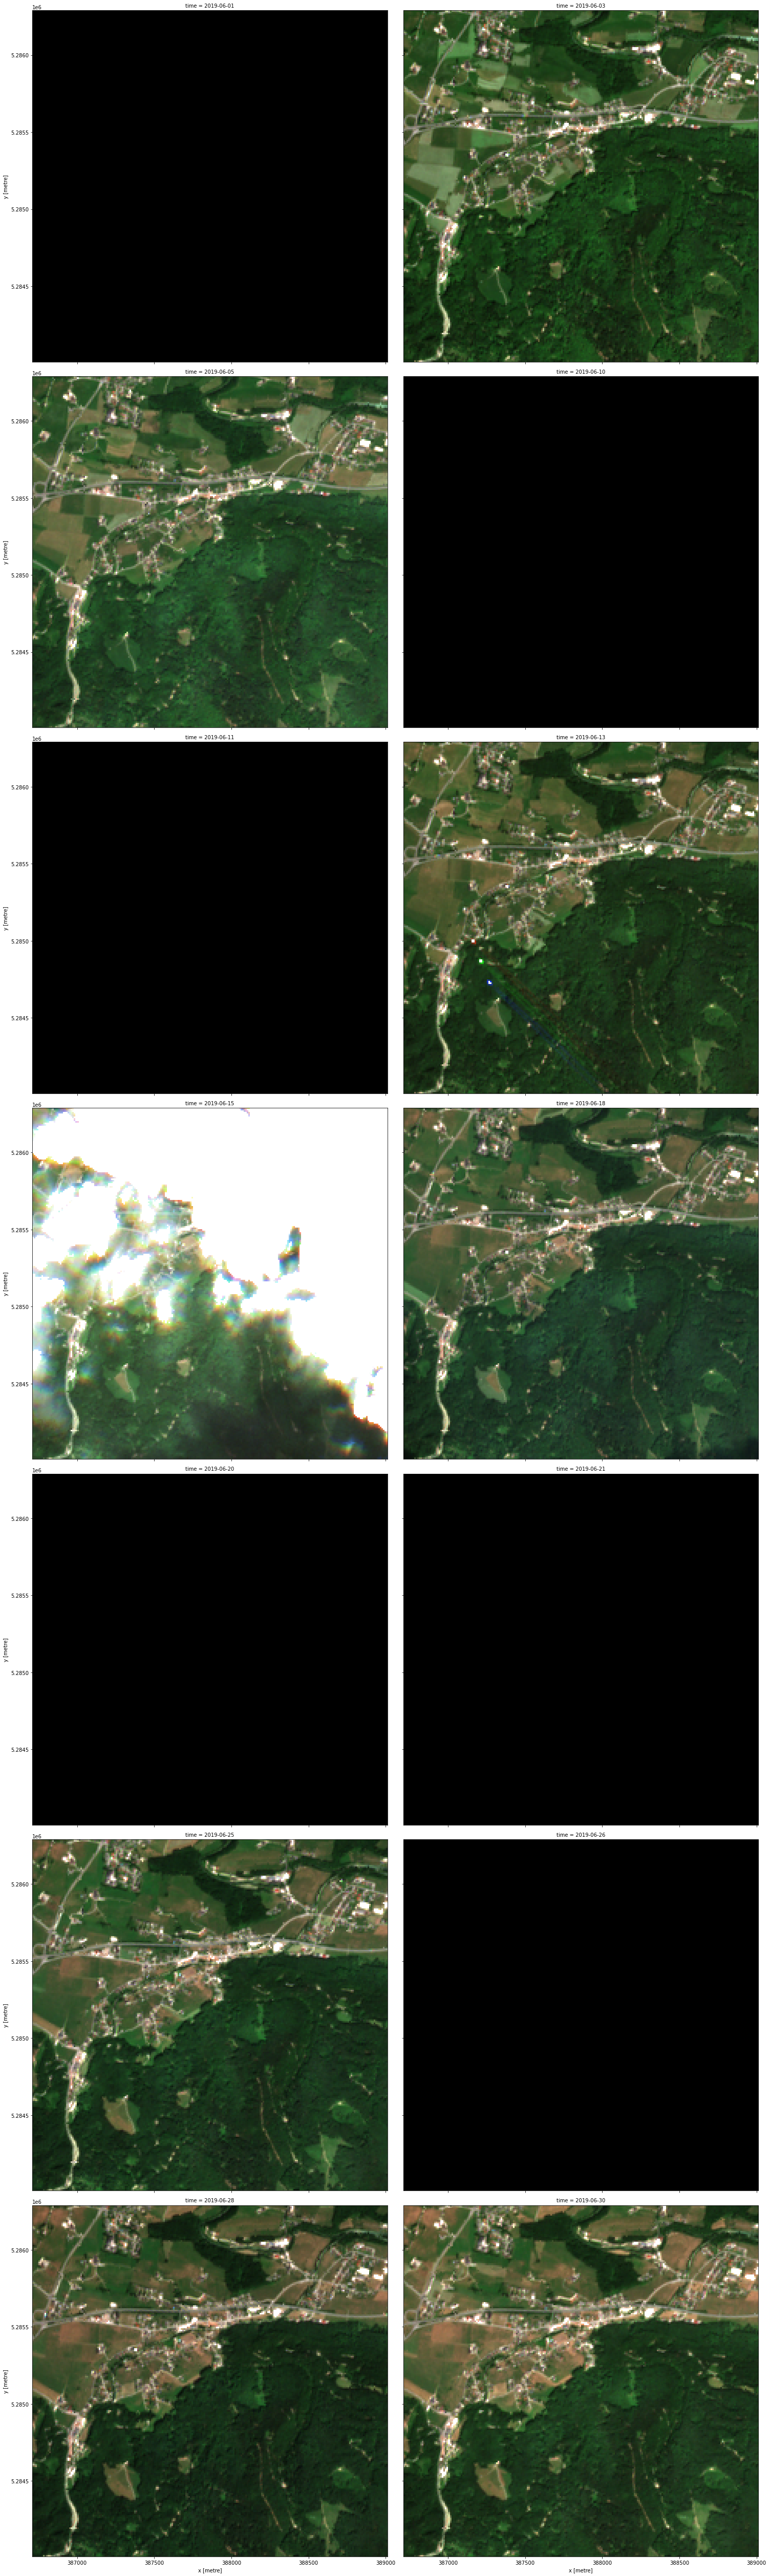

In [7]:
data_plot = data_tcc.to_array(dim='color')
fake_saturation = 2000
data_plot = data_plot.transpose(*(data_plot.dims[1:]+data_plot.dims[:1]))
data_plot = data_plot.where((data_plot <= fake_saturation).all(dim='color'))
data_plot /= fake_saturation
#col_wrap = number of columns
data_plot.plot.imshow(
    x='x', 
    y='y',
    col='time',
    size=10,
    col_wrap=2,
)

# Get array

- Reflectance bands

In [14]:
data_array = np.array(data.to_array(), dtype='float')
data_array.shape

(10, 14, 228, 230)

In [15]:
# reshape array: images x bands x rows x columns and delete empty data
data_array_reshape = []
for i in range(data_array.shape[1]):
    img = data_array[:, i, :, :]
    if np.sum(img) != 0:
        data_array_reshape.append(img)
    else:
        pass
data_array_reshape = np.array(data_array_reshape)
data_array_reshape.shape

(8, 10, 228, 230)

- Cloud mask

In [16]:
data_cloud_array = np.array(data_cloud.to_array())[0] #there is only one band
data_cloud_array.shape

(14, 228, 230)

# Plot array

- Reflectance bands

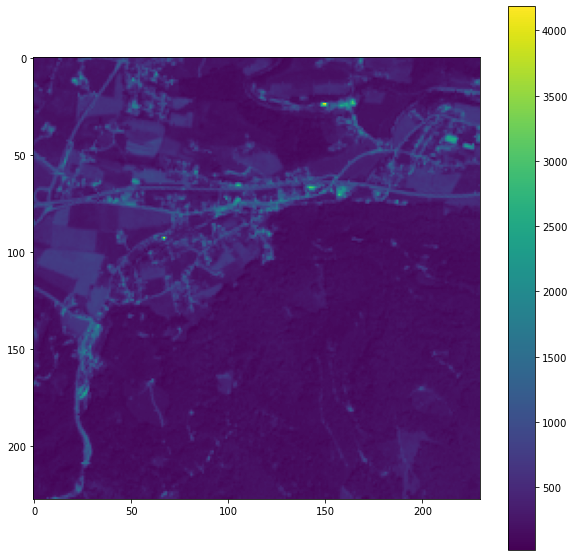

In [17]:
# Plot B2 of first image
plt.figure(figsize = (10,10))
plt.imshow(data_array_reshape[0][0])
plt.colorbar()

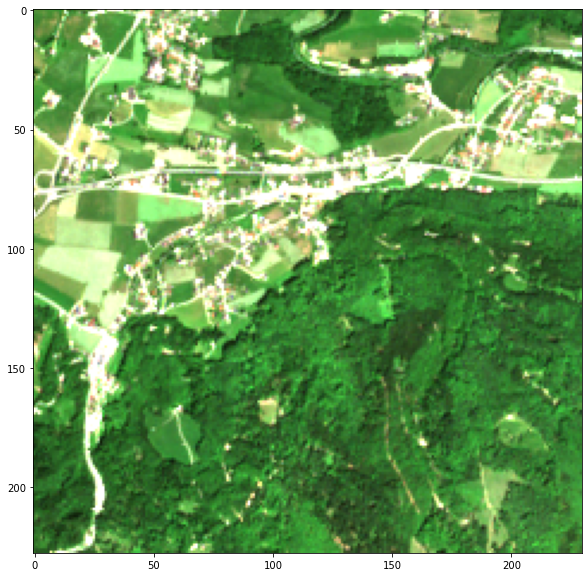

In [22]:
# When I try to plot the TCC with the function of Emma I'm not able
plt.figure(figsize = (10,10))
image = data_array_reshape[0]
img = np.dstack((image[2, ...]/1000, image[1, ...]/1000, image[0, ...]/1000))
img = np.clip(img, 0, 1)
plt.imshow(np.array(img))

- Cloud Mask

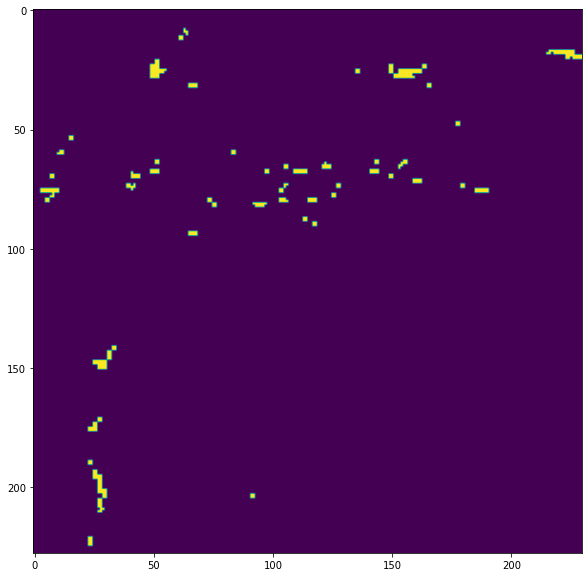

In [23]:
plt.figure(figsize = (10,10))
plt.imshow(data_cloud_array[1])

# Compare NDVI (acube functions vs numpy)

**ACube Functions**

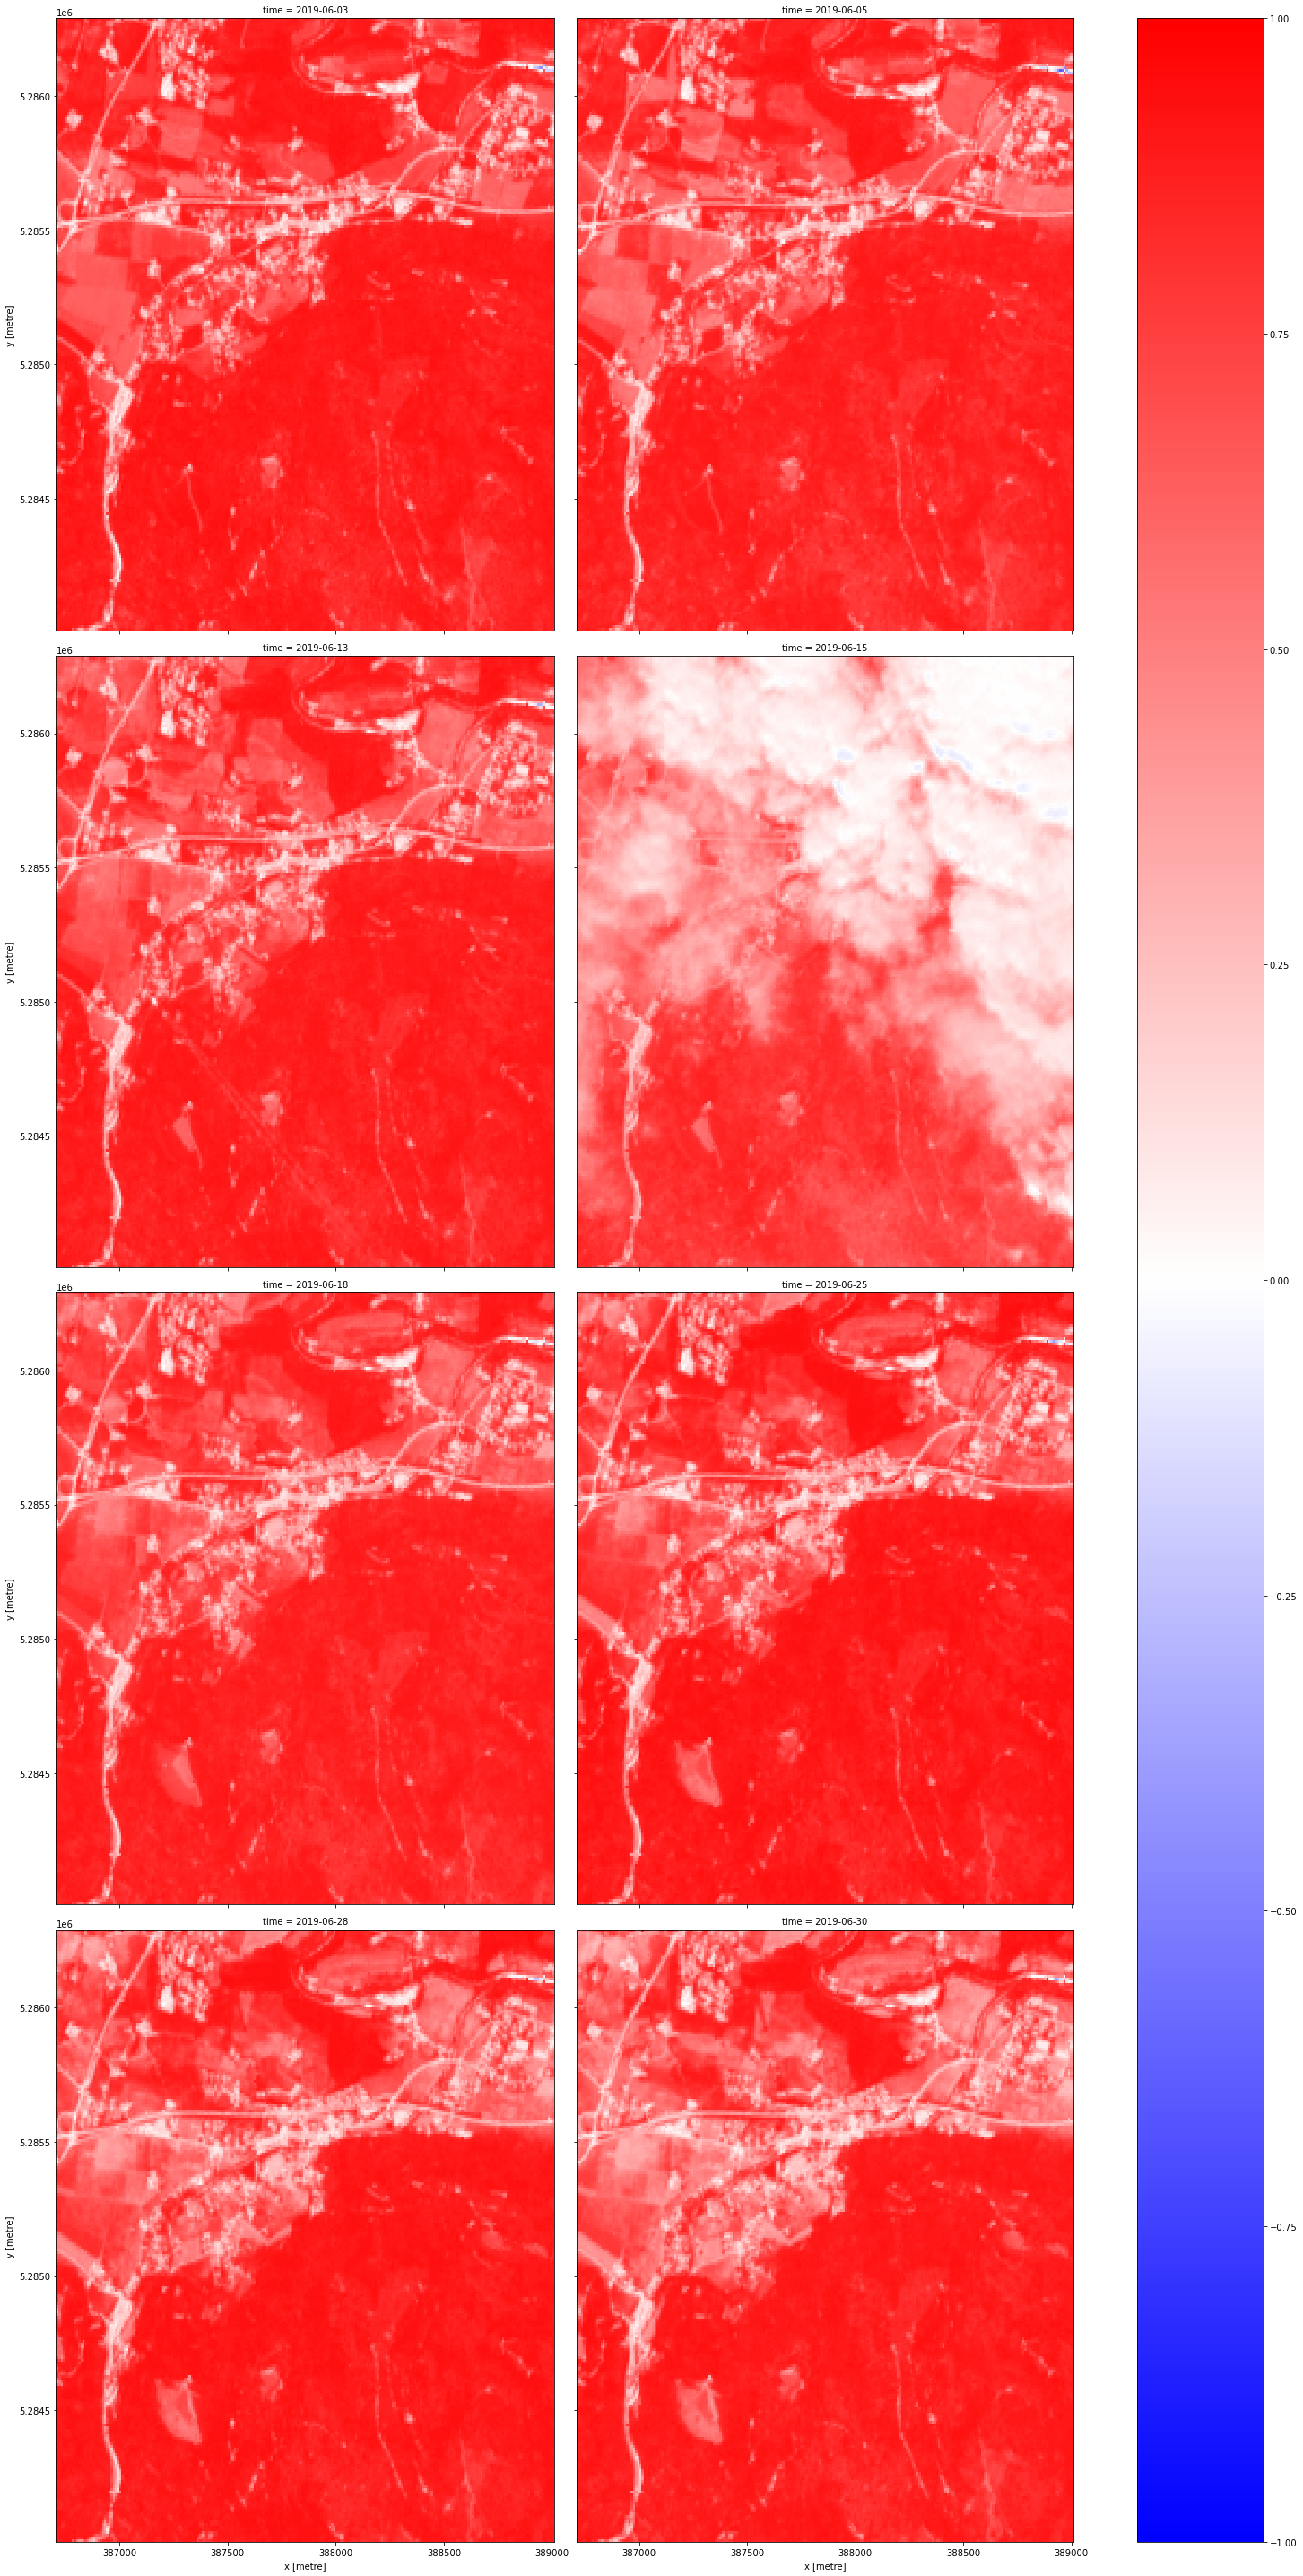

In [24]:
# delete empty images
data_new = data.where(data.B04 != 0).dropna(dim='time') 

# calculate ndvi
ndvi = ((data_new.B08-data_new.B04)/(data_new.B08+data_new.B04))

# plot ndvi
ndvi.plot.imshow(x='x', 
                 y='y',
                 col='time',
                 size=10,
                 col_wrap=2,
                 cmap='bwr',
                 vmin=-1, 
                 vmax=1)

**Numpy**

- First image (example)

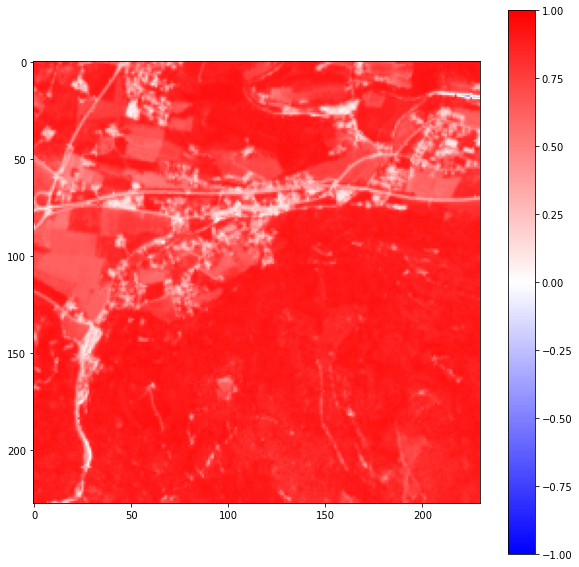

In [25]:
# calculate ndvi
ndvi = (data_array_reshape[0][6] - data_array_reshape[0][2]) / (data_array_reshape[0][6] + data_array_reshape[0][2])

# plot ndvi
plt.figure(figsize = (10,10))
plt.imshow(ndvi, cmap='bwr', vmin = -1, vmax = 1)
plt.colorbar()

- Plot all images

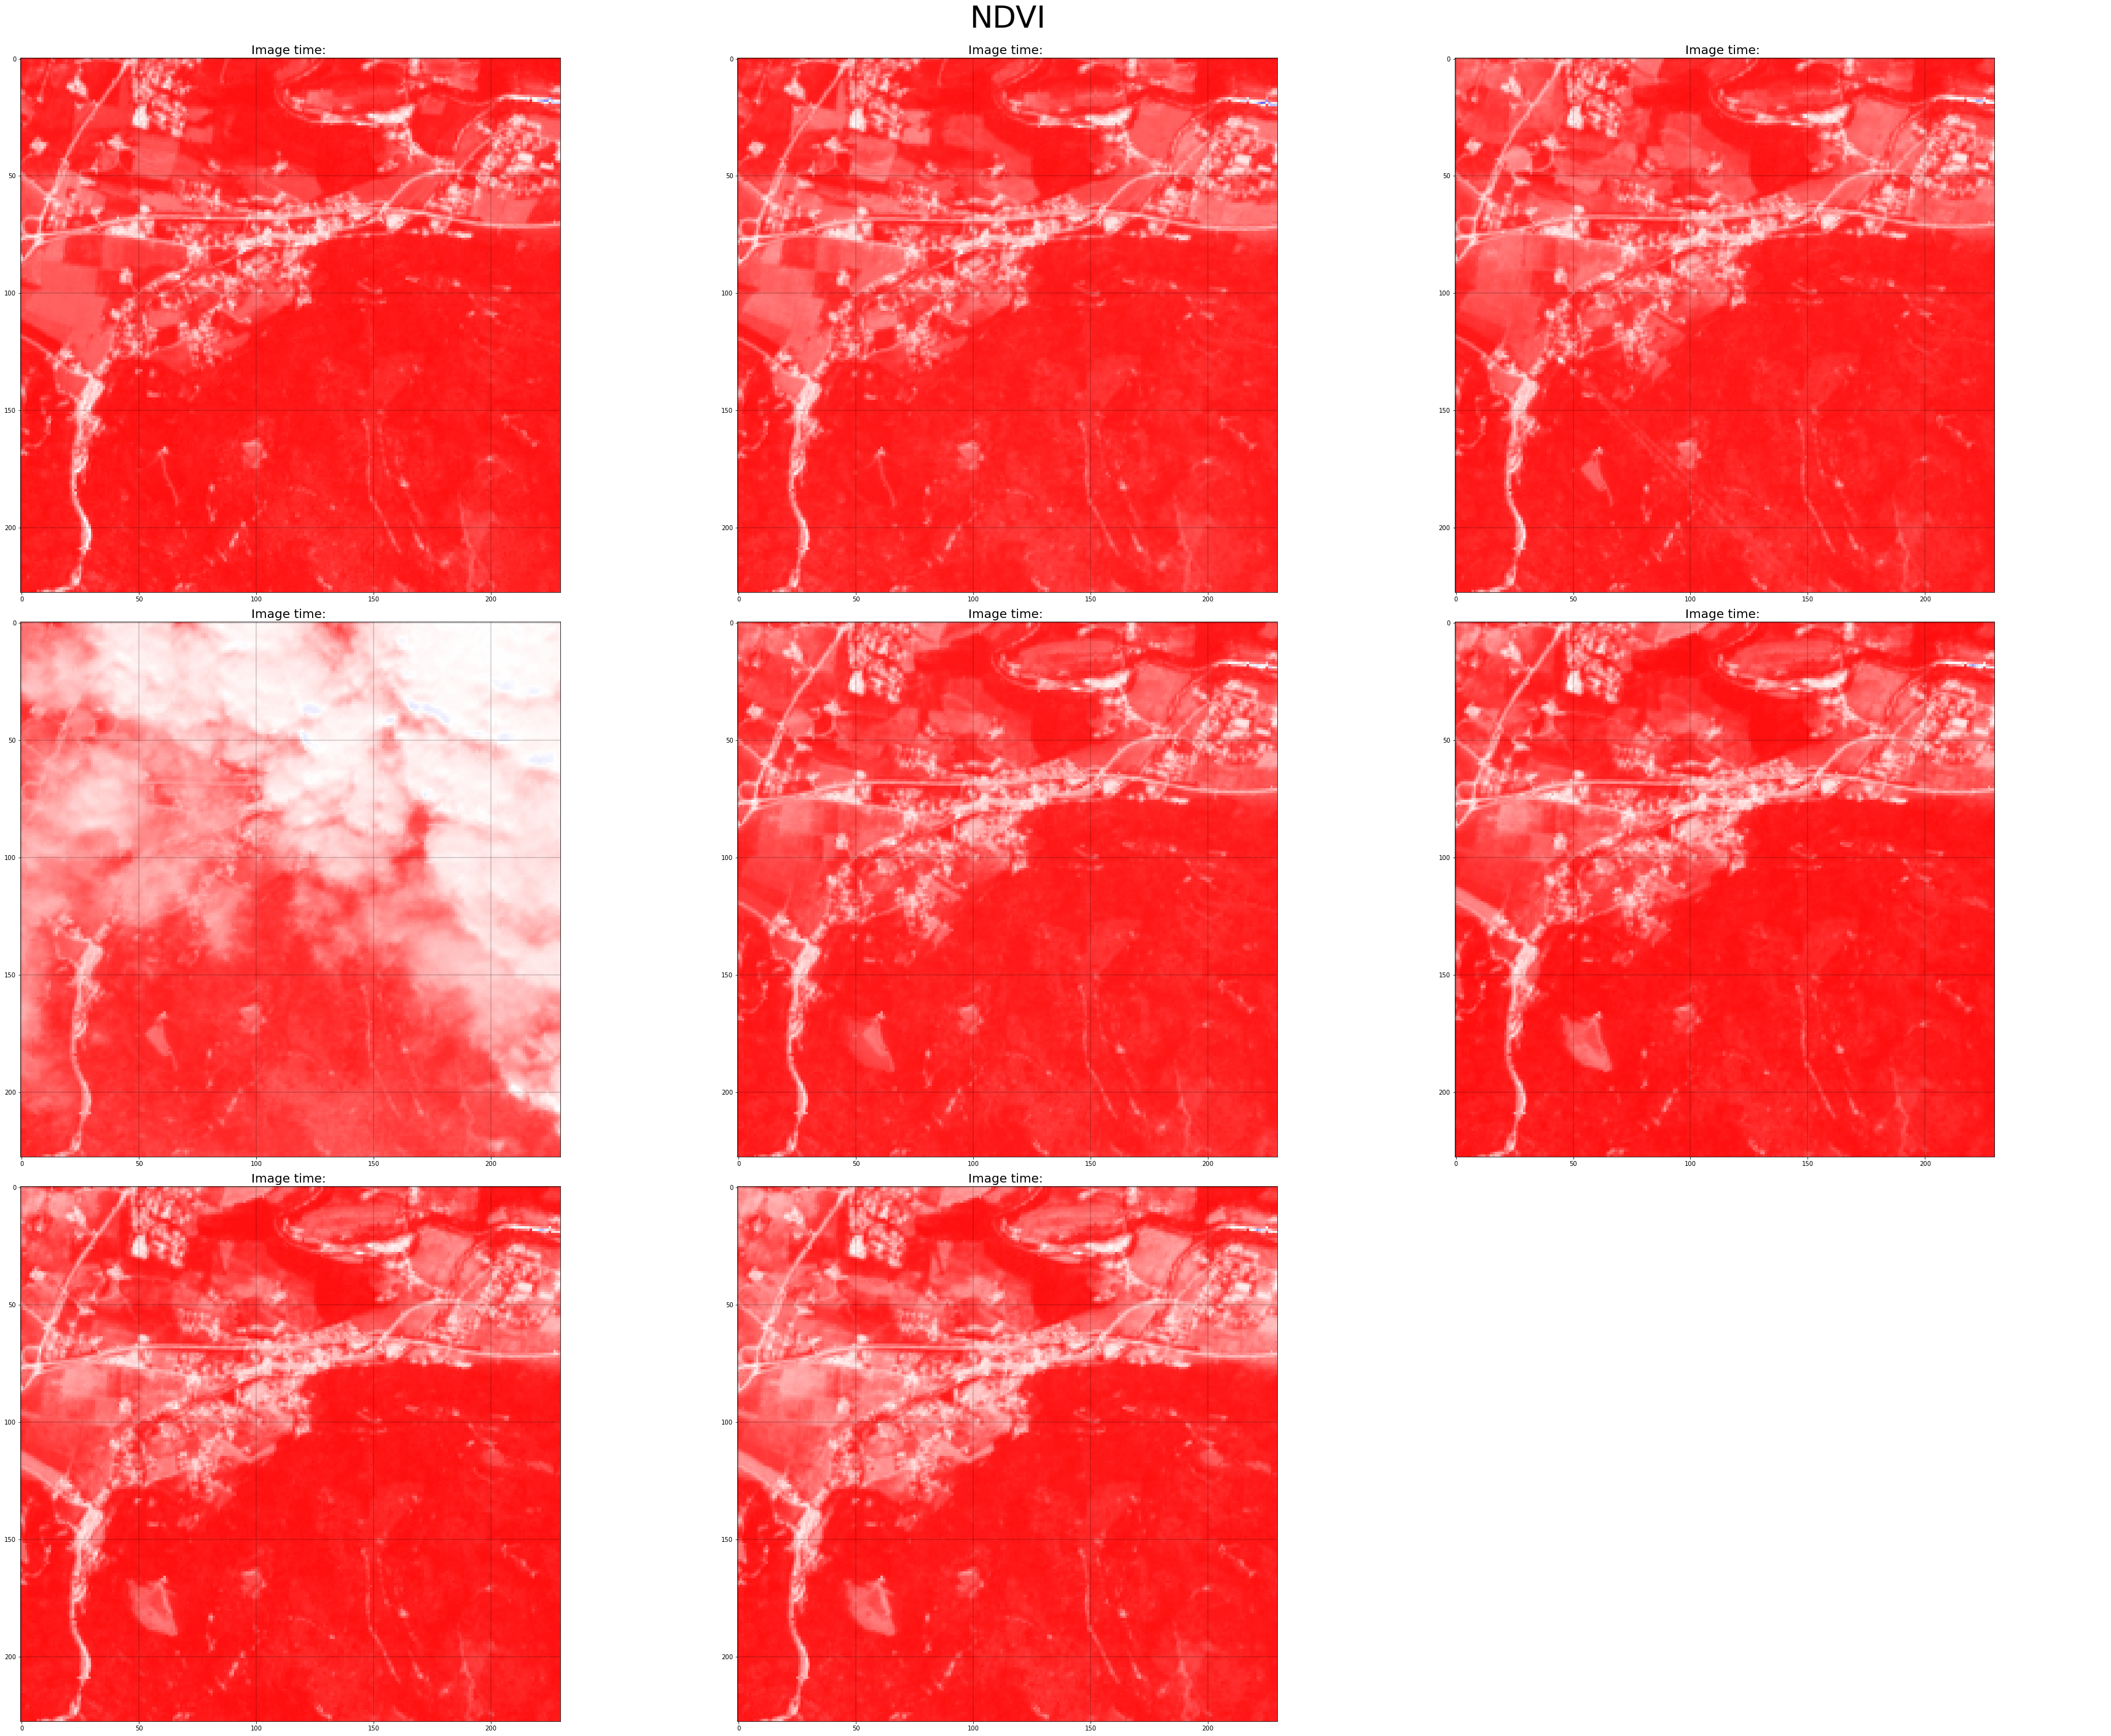

In [26]:
# Fill in number of figures:
n_figures = data_array_reshape.shape[0]

# Prepare subplots
n_rows = int(math.ceil((n_figures)**(1/2)))
n_cols = int(math.ceil(n_figures/n_rows))
rows=[]
columns = []
for row in range(n_rows):
    for col in range(n_cols):
        rows.append(row)
        columns.append(col)

# Subplots and figure title
fig, axs = plt.subplots(n_rows, n_cols, figsize= (50,40))
fig.suptitle(f'NDVI', fontsize = 50)

# Plot images
for sp in range(n_figures):
    ax = axs[rows[sp], columns[sp]]
    ndvi = (data_array_reshape[sp][6] - data_array_reshape[sp][2]) / (data_array_reshape[sp][6] + data_array_reshape[sp][2])
    img = ax.imshow(ndvi, cmap='bwr', vmin = -1, vmax = 1)
    ax.grid(color='black', linewidth=0.3)
    ax.set_title(f'Image time: ', fontsize=20)

# delete empty figures
for image in range(n_figures, n_rows*n_cols):
    axs[rows[image], columns[image]].set_axis_off()


# save
plt.tight_layout()
fig.subplots_adjust(top=0.95)
plt.show()

Los valores negativos los representa como si fueran igual a 1